In [1]:
import numpy as np
import pandas as pd
import statistics  as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn import tree  
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("D:\\GlobalMobile Prices.csv")

In [3]:
df

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,Pixel 7a 2,961,8,256,12,4000,5.9,44,Yes,Android,Helio G99,4.0,November,2025
996,OnePlus,OnePlus 13R 423,158,16,64,64,5500,5.6,65,Yes,Android,Dimensity 9300,3.5,November,2025
997,Xiaomi,Poco X6 Pro 796,1164,6,128,200,4500,5.7,120,No,Android,Helio G99,4.8,January,2025
998,Realme,Narzo 70 809,895,8,64,48,5000,7.0,65,No,Android,A18 Pro,4.6,August,2025


In [4]:
df.shape

(1000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


In [6]:
df.describe()

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,5.000000,2025.0


In [7]:
df.head(500)

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Xiaomi,Mi 13 Ultra 967,997,12,1024,200,5000,5.5,18,No,Android,Snapdragon 7+ Gen 2,4.4,June,2025
496,Realme,GT 7 Pro 938,1181,12,512,12,6000,5.8,33,No,Android,Snapdragon 6 Gen 1,4.9,May,2025
497,Google,Pixel 9 Pro 47,141,8,128,108,4500,7.0,120,Yes,Android,Dimensity 9300,4.5,March,2025
498,Oppo,A98 898,1322,8,256,12,6000,5.8,18,Yes,Android,Snapdragon 7+ Gen 2,3.8,June,2025


In [8]:
print(len(df.columns))
print(df.columns)

15
Index(['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp',
       'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os',
       'processor', 'rating', 'release_month', 'year'],
      dtype='object')


In [9]:
df.columns =['Mobile_brand', 'Mobile_model', 'Cost', 'ram_gb', 'Mobile_storage', 'camera_pxl',
       'battery_mah', 'display_size_inch', 'charging_watt', 'Network_support', 'os',
       'Mobile_processor', 'Mobile_rating', 'release_month', 'year']

In [10]:
df.columns

Index(['Mobile_brand', 'Mobile_model', 'Cost', 'ram_gb', 'Mobile_storage',
       'camera_pxl', 'battery_mah', 'display_size_inch', 'charging_watt',
       'Network_support', 'os', 'Mobile_processor', 'Mobile_rating',
       'release_month', 'year'],
      dtype='object')

In [11]:
df

,Mobile_brand,Mobile_model,Cost,ram_gb,Mobile_storage,camera_pxl,battery_mah,display_size_inch,charging_watt,Network_support,os,Mobile_processor,Mobile_rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,Pixel 7a 2,961,8,256,12,4000,5.9,44,Yes,Android,Helio G99,4.0,November,2025
996,OnePlus,OnePlus 13R 423,158,16,64,64,5500,5.6,65,Yes,Android,Dimensity 9300,3.5,November,2025
997,Xiaomi,Poco X6 Pro 796,1164,6,128,200,4500,5.7,120,No,Android,Helio G99,4.8,January,2025
998,Realme,Narzo 70 809,895,8,64,48,5000,7.0,65,No,Android,A18 Pro,4.6,August,2025


In [12]:
df_numeric=df.select_dtypes(include='number')

In [13]:
corelation_matrix=df_numeric.corr()

In [14]:
print(corelation_matrix)

                       Cost    ram_gb  Mobile_storage  camera_pxl  \
Cost               1.000000 -0.023628        0.000730    0.015682   
ram_gb            -0.023628  1.000000        0.013488    0.011987   
Mobile_storage     0.000730  0.013488        1.000000    0.030576   
camera_pxl         0.015682  0.011987        0.030576    1.000000   
battery_mah       -0.006909  0.024691       -0.026807    0.004402   
display_size_inch -0.023611  0.003696        0.012260   -0.057576   
charging_watt      0.014869  0.001560        0.050683    0.008465   
Mobile_rating     -0.001010 -0.060605        0.028872    0.032554   
year                    NaN       NaN             NaN         NaN   

                   battery_mah  display_size_inch  charging_watt  \
Cost                 -0.006909          -0.023611       0.014869   
ram_gb                0.024691           0.003696       0.001560   
Mobile_storage       -0.026807           0.012260       0.050683   
camera_pxl            0.004402       

In [15]:
#K Means
X = df[['ram_gb', 'Mobile_storage', 'camera_pxl',
       'battery_mah', 'display_size_inch', 'charging_watt']].values

In [16]:
X

array([[1.60e+01, 1.28e+02, 1.08e+02, 6.00e+03, 6.60e+00, 3.30e+01],
       [6.00e+00, 1.28e+02, 6.40e+01, 4.50e+03, 6.90e+00, 1.00e+02],
       [1.60e+01, 6.40e+01, 6.40e+01, 4.00e+03, 6.80e+00, 4.40e+01],
       ...,
       [6.00e+00, 1.28e+02, 2.00e+02, 4.50e+03, 5.70e+00, 1.20e+02],
       [8.00e+00, 6.40e+01, 4.80e+01, 5.00e+03, 7.00e+00, 6.50e+01],
       [1.60e+01, 5.12e+02, 6.40e+01, 4.50e+03, 5.80e+00, 1.80e+01]])

In [17]:
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=40)

In [18]:
centers=kmeans.cluster_centers_
labels = kmeans.labels_

In [19]:
print("Cluster centers:\n", centers)

Cluster centers:
 [[   9.0418251   207.81749049   78.97338403 4182.5095057     6.36501901
    62.49429658]
 [   9.41747573  357.59223301   85.41747573 6000.            6.41019417
    61.20873786]
 [   9.06508876  884.63905325   85.90532544 4523.66863905    6.39112426
    67.18343195]
 [   9.17679558  345.45856354   84.66850829 5280.38674033    6.37016575
    64.61878453]]


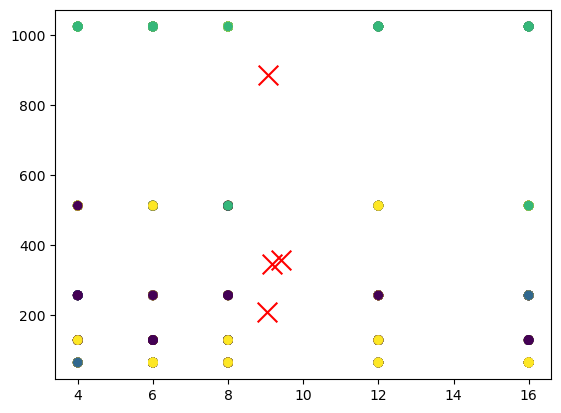

In [20]:
plt.scatter(X[:, 0], X[:, 1], c= labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')

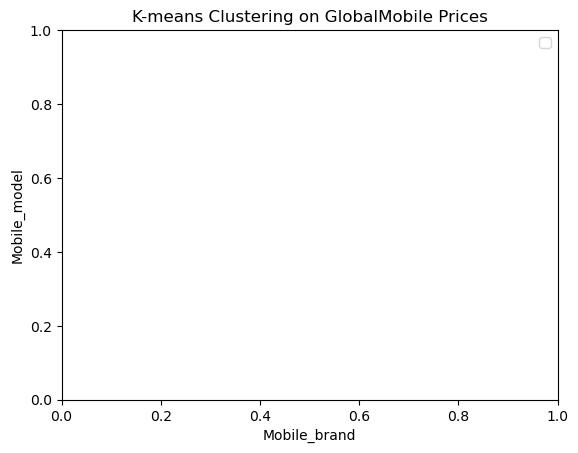

In [21]:
plt.title('K-means Clustering on GlobalMobile Prices')
plt.xlabel('Mobile_brand')
plt.ylabel('Mobile_model')
plt.legend()

In [22]:
#Matplotlib
df.head(10)

,Mobile_brand,Mobile_model,Cost,ram_gb,Mobile_storage,camera_pxl,battery_mah,display_size_inch,charging_watt,Network_support,os,Mobile_processor,Mobile_rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
5,OnePlus,Nord 4 295,938,16,512,200,5000,6.2,120,No,Android,Exynos 2400,3.7,May,2025
6,Infinix,GT 20 Pro 112,418,12,256,64,6000,6.9,44,No,Android,Exynos 2400,4.1,April,2025
7,Apple,iPhone 16 Pro Max 232,1447,16,64,64,4500,6.7,33,Yes,iOS,Exynos 2400,4.7,November,2025
8,Infinix,Hot 40 111,1354,6,1024,12,5500,5.7,18,Yes,Android,Tensor G4,4.0,July,2025
9,Realme,GT 7 Pro 668,311,8,1024,50,5500,6.9,44,Yes,Android,Snapdragon 6 Gen 1,4.4,March,2025


<function matplotlib.pyplot.show(close=None, block=None)>

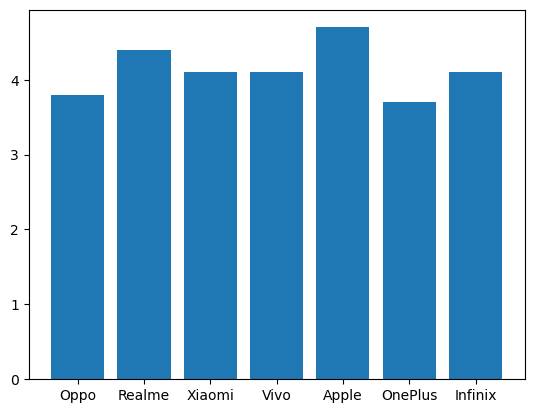

In [23]:
x=np.array(["Oppo","Realme","Xiaomi","Vivo","Apple","OnePlus","Infinix","Apple","Infinix","Realme"])
y=np.array([3.8,4.4,4.1,4.1,3.5,3.7,4.1,4.7,4.0,4.4])
plt.bar(x,y)
plt.show

<Axes: >

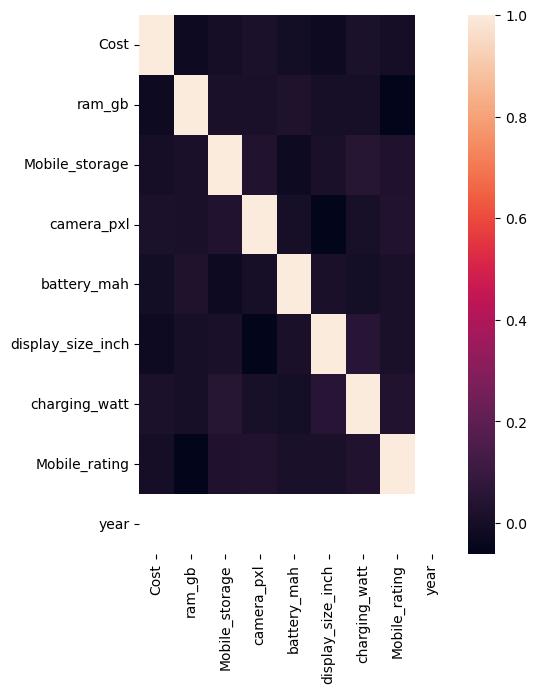

In [24]:
#EDA
plt.figure(figsize=(5,7))
sns.heatmap(df_numeric.corr())

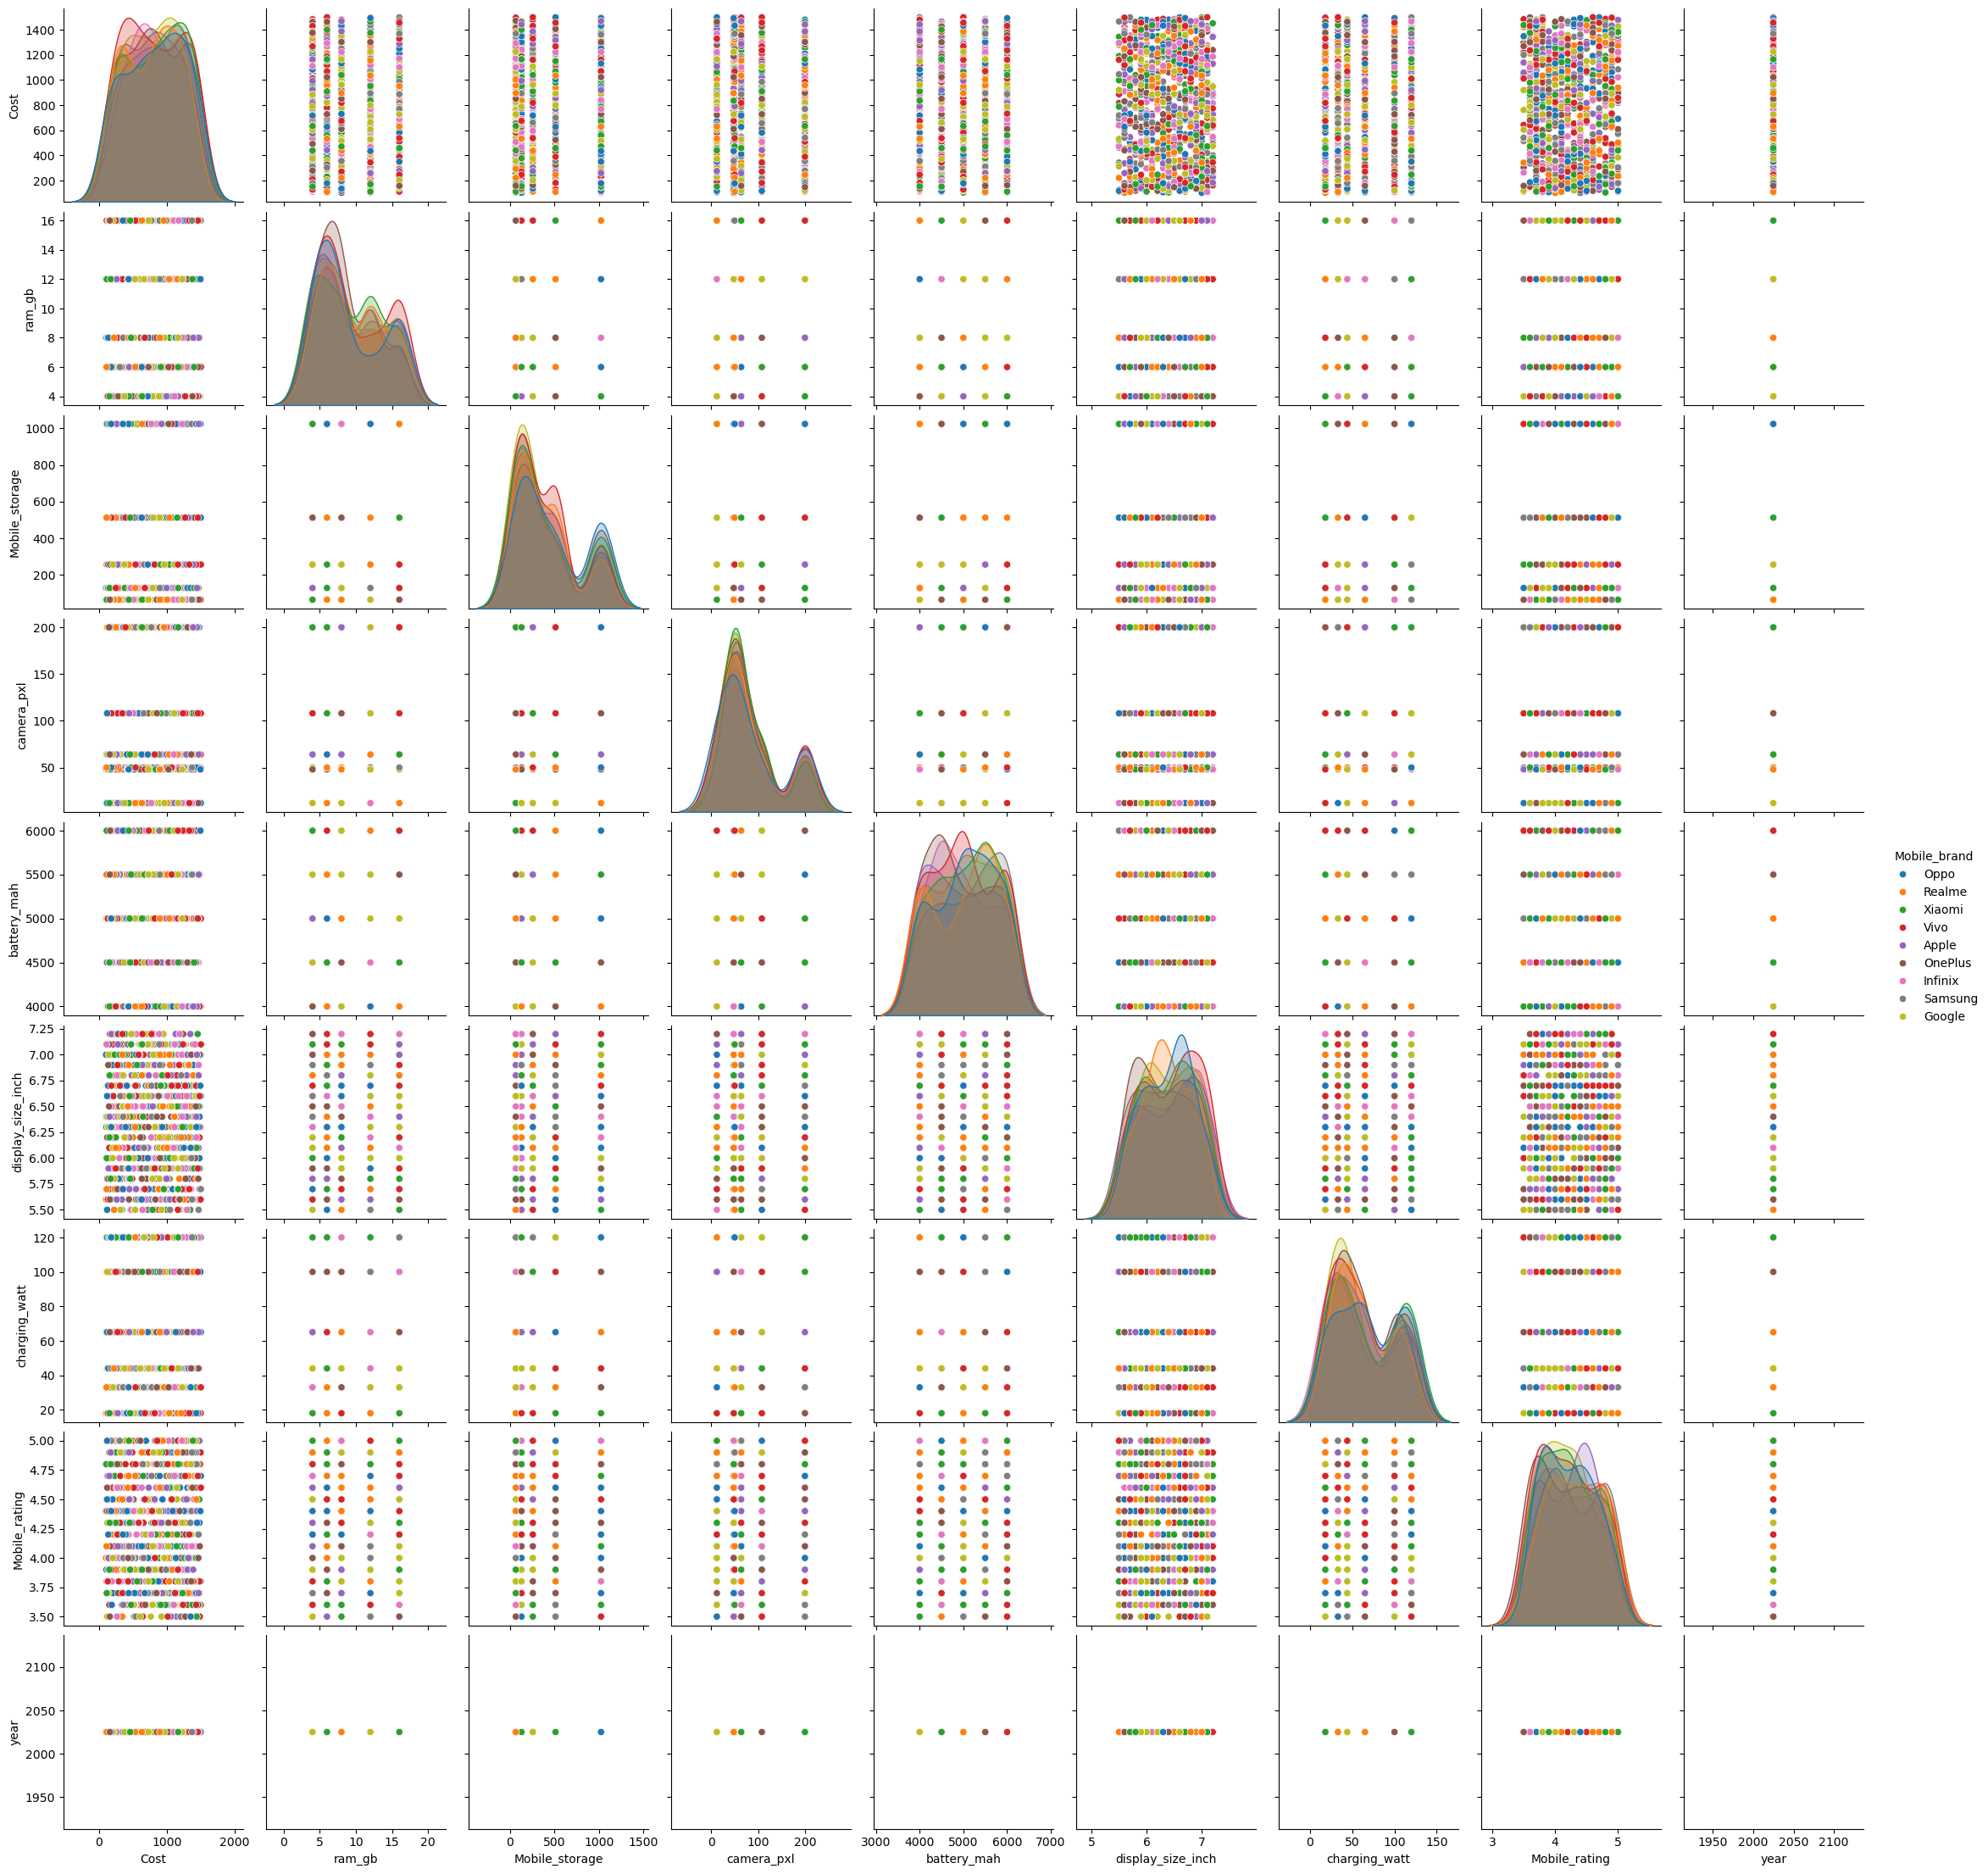

In [25]:
sns.pairplot(df,hue='Mobile_brand')

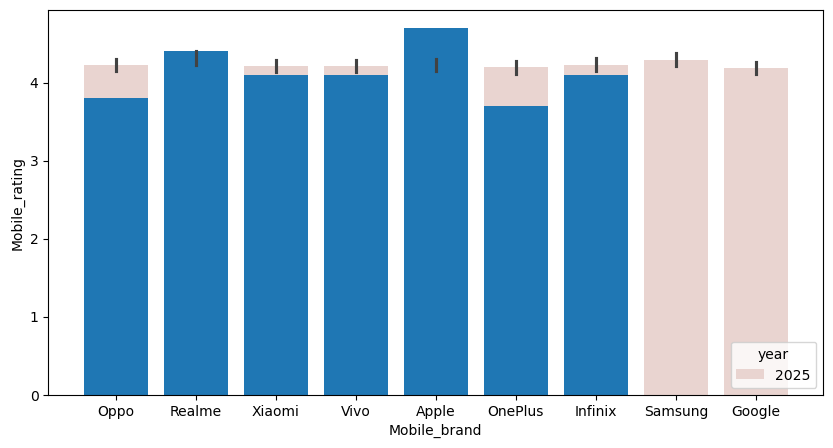

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x='Mobile_brand',y='Mobile_rating',data=df,hue='year')
plt.bar(x,y)
plt.show()

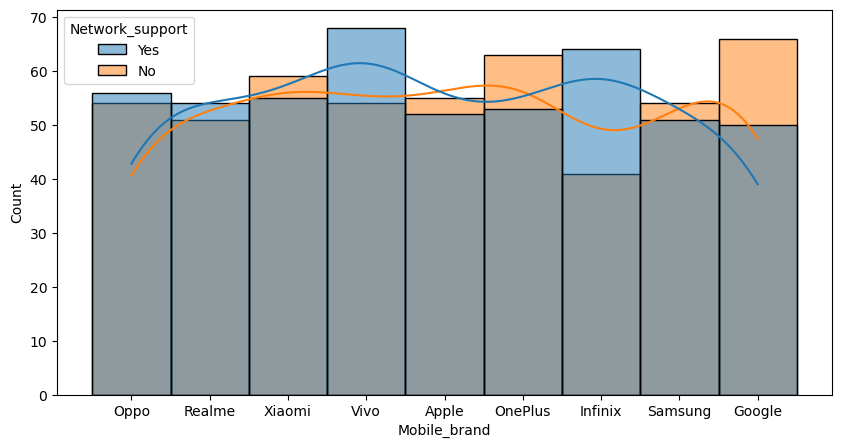

In [27]:
#seaborn
plt.figure(figsize=(10,5))
sns.histplot(x='Mobile_brand',data=df,hue='Network_support',kde=True)
plt.show()